# Import Libraries

In [1]:
# Uncomment the below line and Install 'mlxtend' Library if not installed already
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded=files.upload()

Saving Titanic.csv to Titanic.csv


In [6]:
titanic = pd.read_csv('Titanic.csv')
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [7]:
titanic['Class'].value_counts()

Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

# Pre-Processing

As the data is not in transaction formation We are using transaction Encoder

In [8]:
df=pd.get_dummies(titanic)
df.head(),df.tail()

(   Class_1st  Class_2nd  Class_3rd  Class_Crew  Gender_Female  Gender_Male  \
 0          0          0          1           0              0            1   
 1          0          0          1           0              0            1   
 2          0          0          1           0              0            1   
 3          0          0          1           0              0            1   
 4          0          0          1           0              0            1   
 
    Age_Adult  Age_Child  Survived_No  Survived_Yes  
 0          0          1            1             0  
 1          0          1            1             0  
 2          0          1            1             0  
 3          0          1            1             0  
 4          0          1            1             0  ,
       Class_1st  Class_2nd  Class_3rd  Class_Crew  Gender_Female  Gender_Male  \
 2196          0          0          0           1              1            0   
 2197          0          0        

# Apriori Algorithm

In [9]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
46,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
11,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
10,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
47,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
...,...,...,...,...,...,...,...,...,...
20,(Gender_Male),"(Class_3rd, Survived_No)",0.786461,0.239891,0.191731,0.243790,1.016252,0.003066,1.005156
17,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
16,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
13,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116


In [11]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
46,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
11,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
10,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
47,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
44,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
69,"(Survived_No, Class_Crew)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
64,"(Gender_Male, Age_Adult)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
31,(Class_Crew),"(Gender_Male, Age_Adult)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480
26,"(Gender_Male, Age_Adult)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157


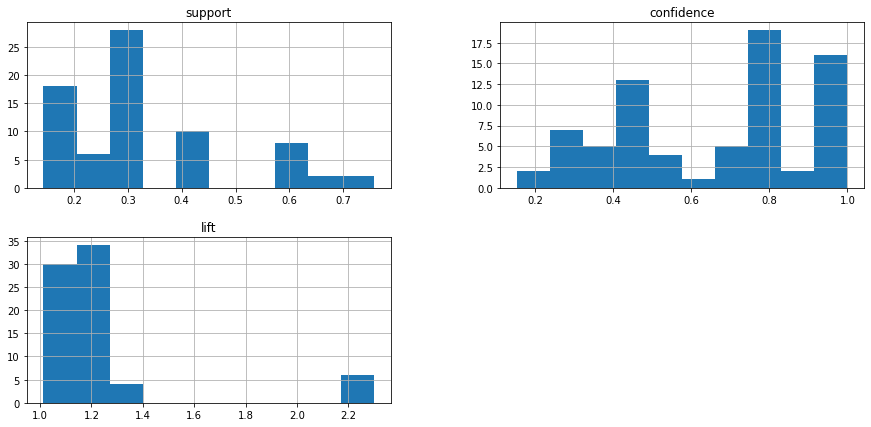

In [12]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

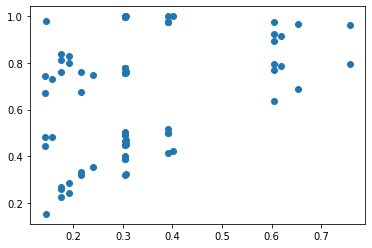

In [13]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


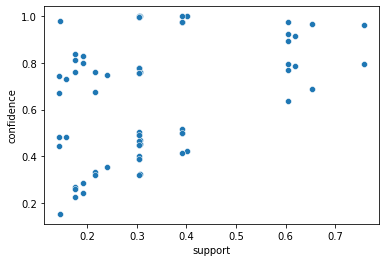

In [14]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()